In [2]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)

<h2><u>Case Study: Wholesale Market Prices: Organic versus Conventional - Part 2</u></h2>

In this Case Study you will practice reading and working with data that is stored in different file formats. More specifically, you will work with <b><i>text files (.txt)</i></b>, <b><i>comma-seperated values files</i></b> (.csv), and <b><i>Excel spreadsheets (.xls)</i></b>. 

<h3><b><i>Background</i></b></h3>
This Case Study continues examining the <b><i>Wholesale Market Price</i></b> dataset from the USDA.

<h3><b><i>Goal</i></b></h3>
The goal of this Case Study is to examine wholesale market prices for organic and conventional produce for selected vegetables in the years <b><i>2012 & 2013</i></b>. You will practice what you've learned in DataCamp's <a href = "https://learn.datacamp.com/courses/python-data-science-toolbox-part-2">Python Data Science Toolbox (Part 2)</a> and <a href = "https://learn.datacamp.com/courses/introduction-to-importing-data-in-python">Introduction to Importing Data with Python</a> by importing and working with different file types</i></b> to access, visualize, and examine the data. 

<h3><b><i>Data</i></b></h3>
The dataset used in this exercise is the <a href = "https://www.ers.usda.gov/data-products/organic-prices.aspx"> Wholesale Market Prices dataset</a> from the USDA [1]. This data contains wholesale prices for both organic and conventional produce for the years 2012 & 2013. This dataset includes price per month, the amount of produce for the wholesale price, as well as other data. You will be working with modified subsets of the 2012 & 2013 data stored as <b><i>.txt</i></b> and <b><i>.csv</i></b> files as well as the original data which is stored in an <b><i>Excel spreadsheet</i></b>. 

Sources: 
<ol style = "font-size:8px">
    <li>USDA. 2021. Organic Price : Wholesale vegetable prices, organic and conventional, monthly and annual, 2012-13. USDA ERS. https://www.ers.usda.gov/data-products/organic-prices.aspx </li>
</ol>



<h3>Flat file imports</h3>

In this section, you will practice <span class="bltn">opening</span> and <span class="bltn">reading</span> <b><i>csv</i></b> and <b><i>text</i></b> files. 

<h4><u>Import Statements</u></h4>

In [3]:
# Import libraries and modules here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4><u>Setting the File Names</u></h4>

The <span class="str">file_name</span> and <span class="str">file_name_csv</span> variables contain the file path and name of the <b><i>text</i></b> and <b><i>csv</i></b> files used for this section. Both of these files contain the same data. 

In [4]:
# file names to use
file_name = 'Data/Vegetables_2012_Cleaned.txt'
file_name_csv = 'Data/Vegetables_2012_Cleaned.csv'

<h4><u>Opening and Reading a Text File</u></h4>

In the cell below the file specified by <b><i>file_name</i></b> is first <span class="bltn">opened</span> as a <b><i>file</i></b> object. More information on file objects can be found in <a href = "https://docs.python.org/3/tutorial/inputoutput.html"> Python's Input and Output Documentation</a>. A <span class="bltn">for </span> loop is used to read in the first four lines of the text file with the <b>readline</b> method and <span class="bltn">printed</span>. The <span class="bltn">type</span> fifth line in <b><i>file_name</i></b> is read in and the <span class="bltn">type</span> printed. The <b><i>file</i></b> is then <b>closed</b>.

In [5]:
# Read and print the first four lines of the file using the with open('file_name') as file syntax. 
# For the fifth line of the file, print the data type returned by file.readline()
with open(file_name) as file: 
    for i in range(0, 4): 
        # print lines 1 - 4 of the file with file.readline() and print
        print(file.readline())
    # print 5th file.readline()'s data type
    print(type(file.readline()))
# Close the file 
file.close()

ï»¿" Wholesale vegetable prices, organic and conventional, monthly and annual, 2012", , , , , , , , , , , , , , , , ,

Commodity,Subgroup,Package,Organic/ Conventional,Terminal Market,12-Jan,12-Feb,12-Mar,12-Apr,12-May,12-Jun,12-Jul,12-Aug,12-Sep,12-Oct,12-Nov,12-Dec, 2012

Artichoke (SF only),Globe,cartons  24s,Conv,San Fran,28.58,30,30.94,18.5,13.48,17.83,30,35.26,25.75,24.66,23.47,26.29,24.12

Artichoke (SF only),Globe,cartons  24s,Org,San Fran,37.34,35.46,N\A,N\A,N\A,30.31,35,40.12,45.5,40.47,32.76,32.5,36.88

<class 'str'>


<h4><u>Opening and Reading a Text File with NumPy</u></h4>

The variable <b><i>ws_np</i></b> contains the results of reading in a <b><i>text</i></b> file using NumPy's <b>loadtxt</b> function. Let's read the <b><i>Wholesale Market Price</i></b> data in using this. 

In [6]:
# Import the file stored in the file_name variable with NumPy using np.loadtxt(file_name, delimiter =",",, dtype = 'str') and store in
# a variable ws_np
ws_np = np.loadtxt(file_name, delimiter=',', dtype='str')

# Print the result 
print(ws_np)

ValueError: the number of columns changed from 21 to 18 at row 2; use `usecols` to select a subset and avoid this error

<h4><u>NumPy Loadtxt Error</u></h4>

The first row of the <b><i>Vegetables_2012_Cleaned.txt</i></b> file which contains the data description (row at <span class="num">position 0</span> for Python) was purposely not skipped in the cell above. The result is that NumPy's loadtxt function cannot read the file.

The first line in the file contains the text: <span class="str">" Wholesale vegetable prices, organic and conventional, monthly and annual, 2012"</span>.  Can you guess why there is a problem reading in this line? 

To fix this add skiprows = 0 to np.loadtxt() to skip the first row of the file.

In [7]:
# Import the file stored in the file_name variable with NumPy using np.loadtxt(file_name, delimiter =",", dtype = 'str', skiprows = 2) 
# and store in variable ws_np
ws_np = np.loadtxt(file_name, delimiter=',', dtype='str', skiprows = 2)


# print the contents of the op_np variable
print(ws_np)

[['Artichoke (SF only)' 'Globe' 'cartons  24s' 'Conv' 'San Fran' '28.58'
  '30' '30.94' '18.5' '13.48' '17.83' '30' '35.26' '25.75' '24.66'
  '23.47' '26.29' '24.12']
 ['Artichoke (SF only)' 'Globe' 'cartons  24s' 'Org' 'San Fran' '37.34'
  '35.46' 'N\\A' 'N\\A' 'N\\A' '30.31' '35' '40.12' '45.5' '40.47'
  '32.76' '32.5' '36.88']
 ['Cabbage' 'Round green type' '40 lb cartons  medium' 'Conv' 'Atlanta'
  'N\\A' 'N\\A' 'N\\A' 'N\\A' 'N\\A' 'N\\A' 'N\\A' '16.5' 'N\\A' 'N\\A'
  'N\\A' 'N\\A' '16.5']
 ['Cabbage' 'Round green type' '45 lb cartons  medium' 'Org' 'Atlanta'
  '33.95' '36.35' '29.59' '24.43' '29' '32.94' 'N\\A' '52.77' '45.5'
  '36.78' '42' '45.65' '37.67']
 ['Cabbage' 'Round green type' '45 lb cartons  18-24s' 'Conv' 'San Fran'
  '14.85' '8.4' '10.37' '8.77' '9.73' '10.81' '10.78' '11.76' '15.86'
  '19.19' '19.16' '15.85' '12.87']
 ['Cabbage' 'Round green type' '45 lb cartons  18-24s' 'Org' 'San Fran'
  'N\\A' '28.59' '25.8' '24.25' '24.42' '24.38' '26.7' '38.79' '50.29'
  '38.8

<h4><u>NumPy Loadtxt Error - Discussion </u></h4>

NumPy's <b>loadtxt</b> function was able to load the text file the second time due to the first row of the text file being skipped using <b><i>skiprows</i></b> <span class="op">=</span> <span class="num">1</span>. This allowed the <span class="str">"Wholesale vegetable prices, organic and conventional, monthly and annual, 2012"</span> row to be skipped. The problem occurs due to the loadtxt function parsing each <span class="str">","</span> in that phrase. 

The <span class="str">","</span> character was specified as the <b><i>delimiter</i></b> for the <b>loadtxt</b> function which led it to treating the string <span class = "str">"Wholesale vegetable prices, organic and conventional, monthly and annual, 2012"</span> as seperate values. This resulted in more columns in the first row than existed in the rest of the dataset. 

The rest of the <b><i>'Vegetables_2012_Cleaned.txt'</i></b> has had the commas removed so that it can be loaded in correctly with the <b>loadtxt</b> function. Another potentional solution is to use a different <b><i>delimiter</i></b> instead of <span class="str">","</span>. 

<h4><u>Accessing Loadtxt's Multidimensional Array</u></h4>

The value returned by <b>loadtxt</b> is a <b><i>multidimensional array</i></b>. <span class="bltn">Print</span> the data <span class="bltn">type</span> of <b><i>ws_np</i></b>. Access and <span class="bltn">print</span> the value in the 8th column <span class="num">index 7</span> in the first row <span class="num">index 0</span>. Then <span class="bltn">print</span> the <span class="bltn">type</span> of that value. 

In [8]:
# Print the type of the ws_np variable
print(type(ws_np))
# Print the value and its type for the value located at ws_np[0][:][7]
print(ws_np[0][:][7])
print(type(ws_np[0][:][7]))

<class 'numpy.ndarray'>
30.94
<class 'numpy.str_'>


<h4><u>Reading Text and CSV Files with Pandas</u></h4>

Pandas can also be used to read a text file using <b>read_csv</b>. The <b>read_csv</b> function can also be used to read in <b><i>csv</i></b> files into a <b><i>DataFrame</i></b>. In the Code cell below the <b><i>text</i></b> file, <b><i>file_name</i></b> is stored in the variable <b><i>ws_txt_df</i></b>. 

In [9]:
# Read in the text file file_name variable using pandas and store as ws_txt_df with pd.read_csv(file_name)
ws_txt_df = pd.read_csv(file_name)

In the Code cell below the <b><i>csv</i></b> file is read in as <b><i>ws_csv_df</i></b>. 

In [10]:
# Read in the csv file file_name csv using pandas and store as ws_csv_df with pd.read_csv(file_name_csv)
ws_csv_df =pd.read_csv(file_name_csv)

Next let's check to see if the contents of the two <b><i>DataFrames</i></b> are equal using the <b>equals</b> method. 

In [11]:
# Test if ws_txt_df is equal to ws_csv_df using ws_txt_df.equals(ws_csv_df)
ws_txt_df.equals(ws_csv_df)

True

<h3>Working with Excel spreadsheets</h3>

In this section, you will practice reading the <b><i>Wholesale Market Price</i></b> data that is stored in an <b><i> Excel Spreadsheet</i></b>. 

<h4><u>Reading a Spreadsheet with Pandas</u></h4>

The <span class="str">xls_file</span> contains the file path and name of a <b><i>spreadsheet</i></b> containing two <b><i>sheets</i></b>. <b><i>ExcelFile</i></b> is used to read the file into an <b><i>ExcelFile</i></b> object called <b><i>ws_xls_df</i></b>. The names of the <b><i>sheets</i></b> in the spreadsheet are then accessed using <b><i>.sheet_names</i></b> and the results <span class="bltn">printed</span>. 

In [12]:
# File name for Excel spreadsheet
xls_file = 'Data/Vegetables.xls'

# Import the Excel spreadsheet using panda's pd.ExcelFile(). Store in a variable ws_xls_df
ws_xls_df = pd.ExcelFile(xls_file)

# Print the sheet names using .sheet_names with the variable you just created in the line of code above 
print(ws_xls_df.sheet_names)

['2013', '2012']


<h4><u>Loading a Sheet</u></h4>

Now that we know the names of the <b><i>sheets</i></b>, we can <b><i>parse</i></b> one into a <b><i>DataFrame</i></b> called <b><i>ws_12_df</i></b>. 

In [13]:
# Load the 2012 sheet.  Use the variable name ws_12_df.parse() and read in the '2012' sheet.
# Skip the first row of the spreadsheet skiprows = [0] because this contains the a summary of the data, not the column names. 
ws_12_df = ws_xls_df.parse('2012', skiprows=1)

# Display the ws_12_df using .head()
print(ws_12_df.head())

             Commodity          Subgroup                Package  \
0  Artichoke (SF only)             Globe           cartons, 24s   
1  Artichoke (SF only)             Globe           cartons, 24s   
2              Cabbage  Round green type  40 lb cartons, medium   
3              Cabbage  Round green type  45 lb cartons, medium   
4              Cabbage  Round green type  45 lb cartons, 18-24s   

  Organic/ Conventional Terminal Market 2012-01-01 00:00:00  \
0                  Conv        San Fran           28.583333   
1                   Org        San Fran            37.34375   
2                  Conv         Atlanta                 N\A   
3                   Org         Atlanta           33.945652   
4                  Conv        San Fran               14.85   

  2012-02-01 00:00:00 2012-03-01 00:00:00 2012-04-01 00:00:00  \
0                  30             30.9375                18.5   
1           35.461538                 N\A                 N\A   
2                 N\A  

<h4><u>Modifying DataFrame Column Names</u></h4>

The original column names in the <span class="str">2012</span> sheet are rather long. Let's update them with new names by creating a <span class="bltn">list</span> containing the updated names as <span class="str">strings</span> then setting the <b><i>columns</i></b> of <b><i>ws_12_df</i></b> to the <span class="bltn">list</span> 

In [14]:
# Let's replace the headings with more uniform names
new_col = ['Commodity', 'Subgroup', 'Package', 'Method', 'Terminal Market', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year']

# Set the ws_12_df.columns equal to the new column names. 
ws_12_df.columns = new_col

# Check that the column names have been updated by printing the first 5 rows of the DataFrame 
print(ws_12_df.head())

             Commodity          Subgroup                Package Method  \
0  Artichoke (SF only)             Globe           cartons, 24s   Conv   
1  Artichoke (SF only)             Globe           cartons, 24s    Org   
2              Cabbage  Round green type  40 lb cartons, medium   Conv   
3              Cabbage  Round green type  45 lb cartons, medium    Org   
4              Cabbage  Round green type  45 lb cartons, 18-24s   Conv   

  Terminal Market        Jan        Feb        Mar        Apr        May  \
0        San Fran  28.583333         30    30.9375       18.5  13.477273   
1        San Fran   37.34375  35.461538        N\A        N\A        N\A   
2         Atlanta        N\A        N\A        N\A        N\A        N\A   
3         Atlanta  33.945652      36.35  29.590909  24.428571         29   
4        San Fran      14.85        8.4      10.37       8.77       9.73   

         Jun    Jul        Aug    Sep        Oct        Nov        Dec   Year  
0  17.833333     3

<h4><u>Plotting the Data</u></h4>
Let's plot some of the data stored in <b><i>ws_12_df</i></b>. In the Code cell below, a <b><i>plot</i></b> is created displaying the <i>Months</i> on the x-axis and the <i>Price</i> of organically grown artichoke. A <b><i>scatterplot</i></b> is then overlaid on the same figure resulting in a line graph with data points. 

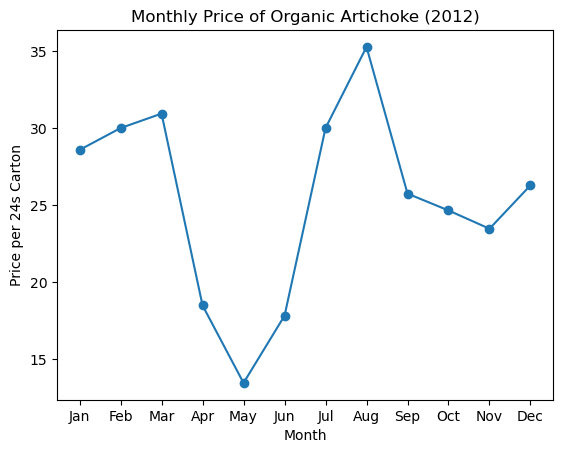

In [15]:
# Plot the price of organically grown artichoke for each of the 12 months. 

# Store the monthly prices for organic artichoke in 2012 as the variable o_a_12
o_a_12 = ws_12_df.iloc[0, 5:17]

# Set the title, x-axis and y-axis labels
plt.title("Monthly Price of Organic Artichoke (2012)")
plt.xlabel("Month")
plt.ylabel("Price per 24s Carton")

plt.plot(o_a_12)
plt.scatter(new_col[5:17], o_a_12)
plt.show()

<h3 class="yt">Your Turn: 1</h3>
<b><i>Read</i></b> and <span class="bltn"> print</span> the first <span class="num">10 lines</span> in the the <span class="str">'Vegetables_2013_Cleaned.txt'</span> file. Use the <span class="bltn">with open () as file:</span> syntax. 

In [16]:
# set the file to a variable
clean_veggie_2013 = 'Data/Vegetables_2013_Cleaned.txt'
# open function to open the 2013 vegetable data as a file
with open(clean_veggie_2013) as file: 
    for i in range(0, 10): 
        # print lines 1 - 4 of the file with file.readline() and print
        print(file.readline())
# Close the file 
file.close()

ï»¿" Wholesale vegetable prices, organic and conventional, monthly and annual, 2013",,,,,,,,,,,,,,,,,

Commodity,Subgroup,Package,Organic/ Conventional,Terminal Market,13-Jan,13-Feb,13-Mar,13-Apr,13-May,13-Jun,13-Jul,13-Aug,13-Sep,13-Oct,13-Nov,13-Dec,2013

Artichoke (SF only),Globe,cartons  24s,Conv,San Fran,18.25,N\A,34.07,25.21,19.87,21.21,19.6,22.03,35.6,26.5,30.83,34.36,25.79

Artichoke (SF only),Globe,cartons  24s,Org,San Fran,38,16,16,38.5,N\A,28.23,20.8,42,40.72,N\A,N\A,N\A,32.18

Cabbage,Round green type,45 lb cartons  medium,Conv,Atlanta,12.02,10.02,13.5,12.15,13.4,14.04,13.66,14.92,18.95,15.13,13.8,13.81,14.17

Cabbage,Round green type,45 lb cartons  medium,Org,Atlanta,39.38,41.44,36.4,36.25,47.78,63.33,62.82,55.09,45.8,45,42.79,38.73,45.67

Cabbage,Round green type,45 lb cartons  18-24s,Conv,San Fran,25.73,18.33,20.49,11.55,11.23,10.04,10.2,12.45,23.48,20.41,17.53,17.03,16.39

Cabbage,Round green type,45 lb cartons  18-24s,Org,San Fran,42.04,43.53,44.86,69.5,N\A,N\A,N\A,42.

<h3 class="yt">Your Turn: 2</h3>
Read in the <span class="str">'Vegetables.xls'</span> file and open the <b><i>2013</i></b> spreadsheet using pandas <b>ExcelFile</b> and <b>parse</b> functions. <b><i>Skip</b></i> the <span class="num">first row</span> of the 2013 spreadsheet.

In [17]:
# read in the excel file
veggie_xls_df = pd.ExcelFile('Data/Vegetables.xls')
# parse the file to oly get 2013 data
veggie13_xls_df = veggie_xls_df.parse('2013', skiprows= 1)
# print a few lines
veggie13_xls_df.head()

,Commodity,Subgroup,Package,Organic/ Conventional,Terminal Market,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,Dec-13,2013
0,Artichoke (SF only),Globe,"cartons, 24s",Conv,San Fran,18.25,N\A,34.066667,25.214286,19.869048,21.212121,19.6,22.029412,35.6,26.5,30.833333,34.363636,25.79
1,Artichoke (SF only),Globe,"cartons, 24s",Org,San Fran,38,16,16,38.5,N\A,28.230769,20.8,42,40.722222,N\A,N\A,N\A,32.18
2,Cabbage,Round green type,"45 lb cartons, medium",Conv,Atlanta,12.015625,10.02381,13.5,12.154412,13.396739,14.043478,13.66358,14.919753,18.953704,15.127778,13.802632,13.808824,14.17
3,Cabbage,Round green type,"45 lb cartons, medium",Org,Atlanta,39.375,41.441176,36.397059,36.25,47.777778,63.333333,62.818182,55.090909,45.8,45,42.789474,38.727273,45.67
4,Cabbage,Round green type,"45 lb cartons, 18-24s",Conv,San Fran,25.72619,18.328947,20.492857,11.547619,11.22619,10.0375,10.204545,12.452381,23.481481,20.409091,17.527778,17.025,16.39


<h3 class="yt">Your Turn: 3 </h3>
Replace the column names in the DataFrame you created in <span class="yt">Your Turn 2</span> with the column names stored in the previously created <b><i>new_col</i></b> variable. Display the updated DataFrame using the <b>.head()</b> method. 


In [19]:
# replacing the column names
veggie13_xls_df.columns = new_col
# displaying the updated data frame
print(veggie13_xls_df.head())

             Commodity          Subgroup                Package Method  \
0  Artichoke (SF only)             Globe           cartons, 24s   Conv   
1  Artichoke (SF only)             Globe           cartons, 24s    Org   
2              Cabbage  Round green type  45 lb cartons, medium   Conv   
3              Cabbage  Round green type  45 lb cartons, medium    Org   
4              Cabbage  Round green type  45 lb cartons, 18-24s   Conv   

  Terminal Market        Jan        Feb        Mar        Apr        May  \
0        San Fran      18.25        N\A  34.066667  25.214286  19.869048   
1        San Fran         38         16         16       38.5        N\A   
2         Atlanta  12.015625   10.02381       13.5  12.154412  13.396739   
3         Atlanta     39.375  41.441176  36.397059      36.25  47.777778   
4        San Fran   25.72619  18.328947  20.492857  11.547619   11.22619   

         Jun        Jul        Aug        Sep        Oct        Nov  \
0  21.212121       19.6  22

<h3 class="yt">Your Turn: 4 </h3>
Create a <b><i>figure</i></b> displaying the <b><i>monthly prices for conventionally grown cabbage from Atlanta during 2013</i></b>. You can choose to use any type of figure or plot used so far in this course or choose one of your own from the MatPlotLib documentation. 

Make sure the figure has a <b><i>title</i></b> and that the <b><i>axes</i></b> are labeled. 

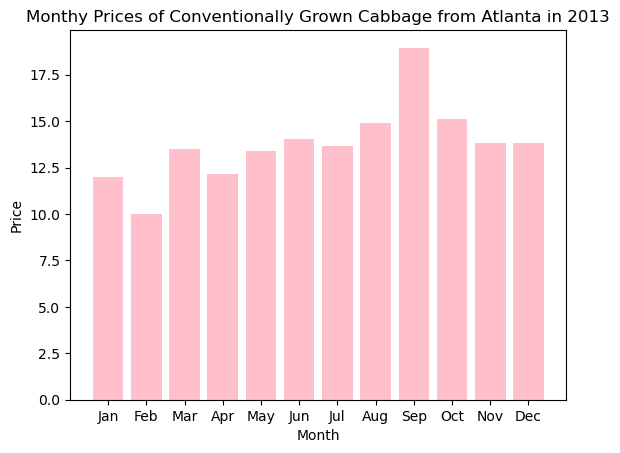

In [25]:
Atl_cab_2013 = veggie13_xls_df.iloc[2, 5:17]

# label the graph
plt.title("Monthy Prices of Conventionally Grown Cabbage from Atlanta in 2013")
# label the x and y axis
plt.xlabel("Month")
plt.ylabel("Price")

plt.bar(new_col[5:17], Atl_cab_2013, color="pink")
plt.show()